In [1]:
import pandas as pd

# load data
gdp = pd.read_csv("../data/GDP.csv", skiprows=4)
life_exp = pd.read_csv("../data/Life_Expectancy.csv", skiprows=4)
unemployment = pd.read_csv("../data/Unemployment.csv", skiprows=4)
education = pd.read_csv("../data/Education.csv", skiprows=4)
pop_growth = pd.read_csv("../data/Population_growth.csv", skiprows=4)

# Cleaning function clearly
def prepare_data(df, indicator_name):
    df_clean = df[['Country Name', '2022']].copy()
    df_clean.columns = ['Country', indicator_name]
    df_clean = df_clean.dropna()
    return df_clean

# clearly clean and merge data
gdp_clean = prepare_data(gdp, 'GDP')
life_exp_clean = prepare_data(life_exp, 'Life Expectancy')
unemployment_clean = prepare_data(unemployment, 'Unemployment')
education_clean = prepare_data(education, 'Education')
pop_growth_clean = prepare_data(pop_growth, 'Population Growth')

data_final = gdp_clean.merge(life_exp_clean, on='Country')\
                      .merge(unemployment_clean, on='Country')\
                      .merge(education_clean, on='Country')\
                      .merge(pop_growth_clean, on='Country')

data_final.head()


,Country,GDP,Life Expectancy,Unemployment,Education,Population Growth
0,Albania,6846.426143,76.83300,10.137000,62.647919,-1.215790
1,Arab World,7658.406470,71.07817,9.953571,33.974030,2.324008
2,Argentina,13935.681111,76.06400,6.805000,107.047913,0.210809
3,Armenia,6571.974455,73.37200,13.379000,59.806450,0.232656
4,Australia,64997.013654,83.20000,3.728000,106.240761,1.272699


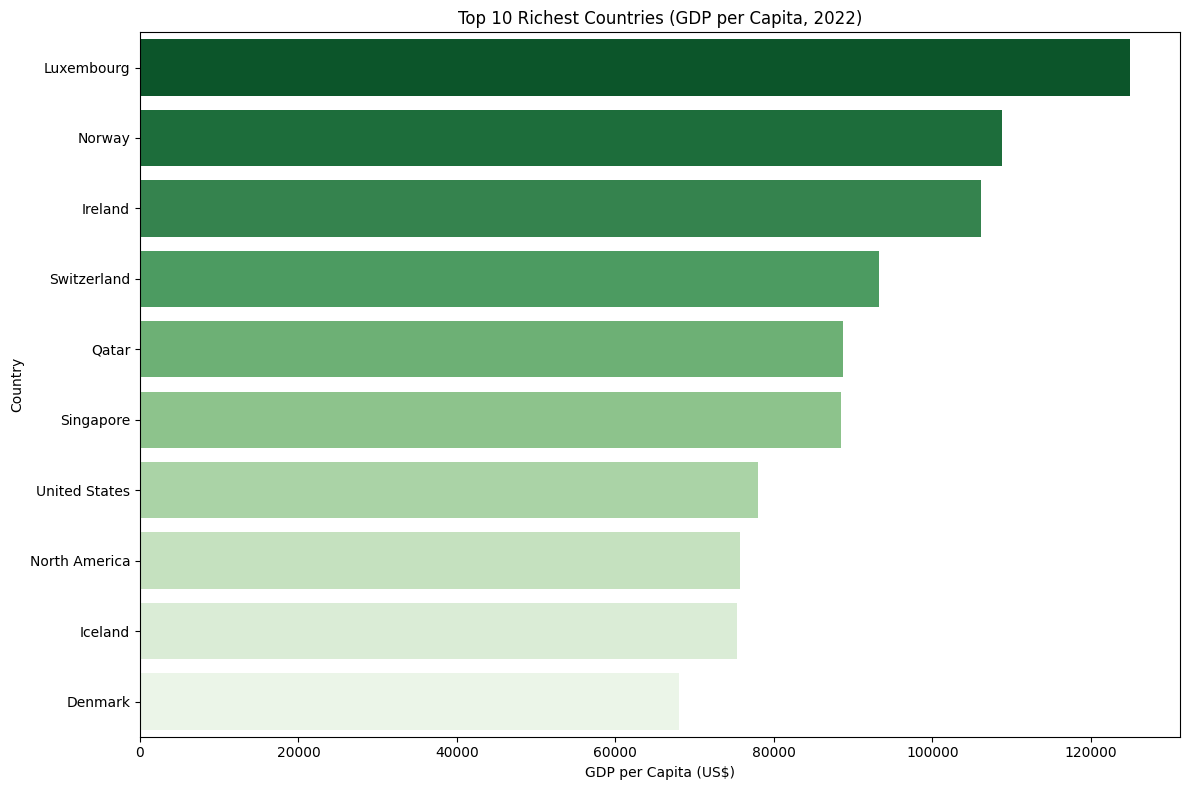

In [5]:
plt.figure(figsize=(12,8))

# explicitly set hue='Country'
sns.barplot(
    x='GDP',
    y='Country',
    data=top10_gdp,
    hue='Country',
    palette='Greens_r',
    legend=False  # turn off redundant legend
)

plt.title('Top 10 Richest Countries (GDP per Capita, 2022)')
plt.xlabel('GDP per Capita (US$)')
plt.ylabel('Country')

plt.tight_layout()
plt.savefig('../images/top10_richest_countries.png')
plt.show()

C:\Users\jkeym\AppData\Local\Temp\ipykernel_6648\3610491610.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP', y='Country', data=top10_gdp, palette='Greens_r')


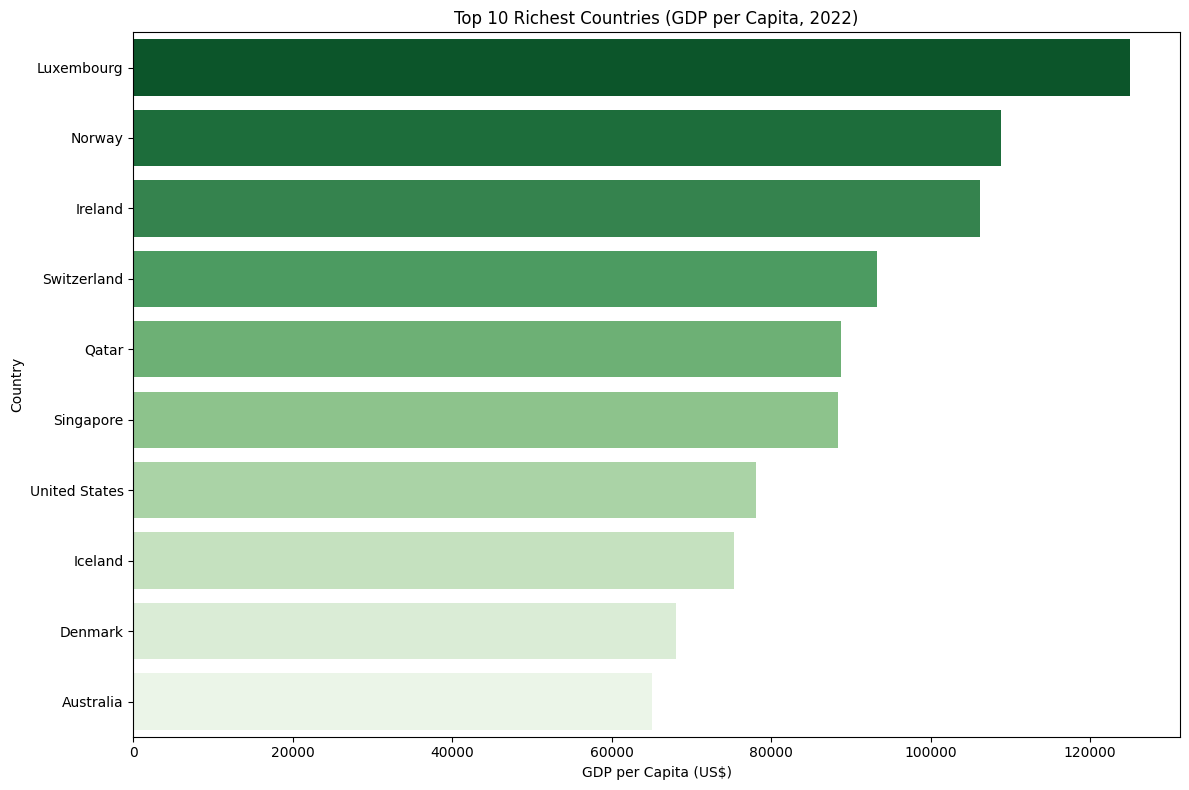

In [8]:
non_countries = ['World', 'High income', 'OECD members', 'Europe & Central Asia', 
                 'East Asia & Pacific', 'South Asia', 'Latin America & Caribbean',
                 'North America', 'Middle East & North Africa', 'Least developed countries: UN classification', 
                 'Low income', 'Upper middle income', 'Lower middle income', 'Low income', 
                 'Sub-Saharan Africa', 'IDA only', 'IDA total', 'IDA blend', 'IBRD only', 
                 'Fragile and conflict affected situations', 'Least developed countries: UN classification']

real_countries_df = data_final[~data_final['Country'].isin(non_countries)]

# Top 10 richest real countries by GDP per capita
top10_gdp = real_countries_df.sort_values(by='GDP', ascending=False).head(10)

# Clear and insightful visualization
plt.figure(figsize=(12,8))
sns.barplot(x='GDP', y='Country', data=top10_gdp, palette='Greens_r')
plt.title('Top 10 Richest Countries (GDP per Capita, 2022)')
plt.xlabel('GDP per Capita (US$)')
plt.ylabel('Country')
plt.tight_layout()

plt.savefig('../images/top10_richest_countries_filtered.png')
plt.show()


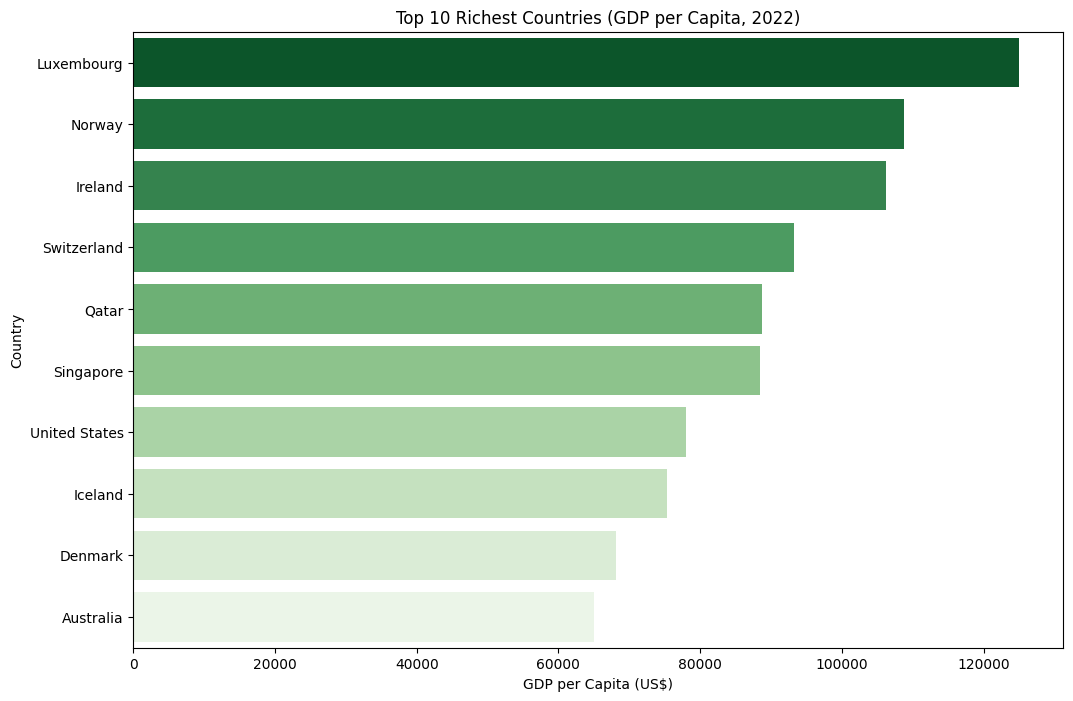

In [9]:
top10_gdp = data_final[~data_final['Country'].isin(['North America', 'IDA only', 'IDA blend', 'IDA total', 'IBRD only'])]\
                .nlargest(10, 'GDP')

plt.figure(figsize=(12, 8))

sns.barplot(x='GDP', y='Country', data=top10_gdp, hue='Country', palette='Greens_r', legend=False)

plt.title('Top 10 Richest Countries (GDP per Capita, 2022)')
plt.xlabel('GDP per Capita (US$)')
plt.ylabel('Country')

plt.savefig('../images/top10_richest_countries.png')
plt.show()


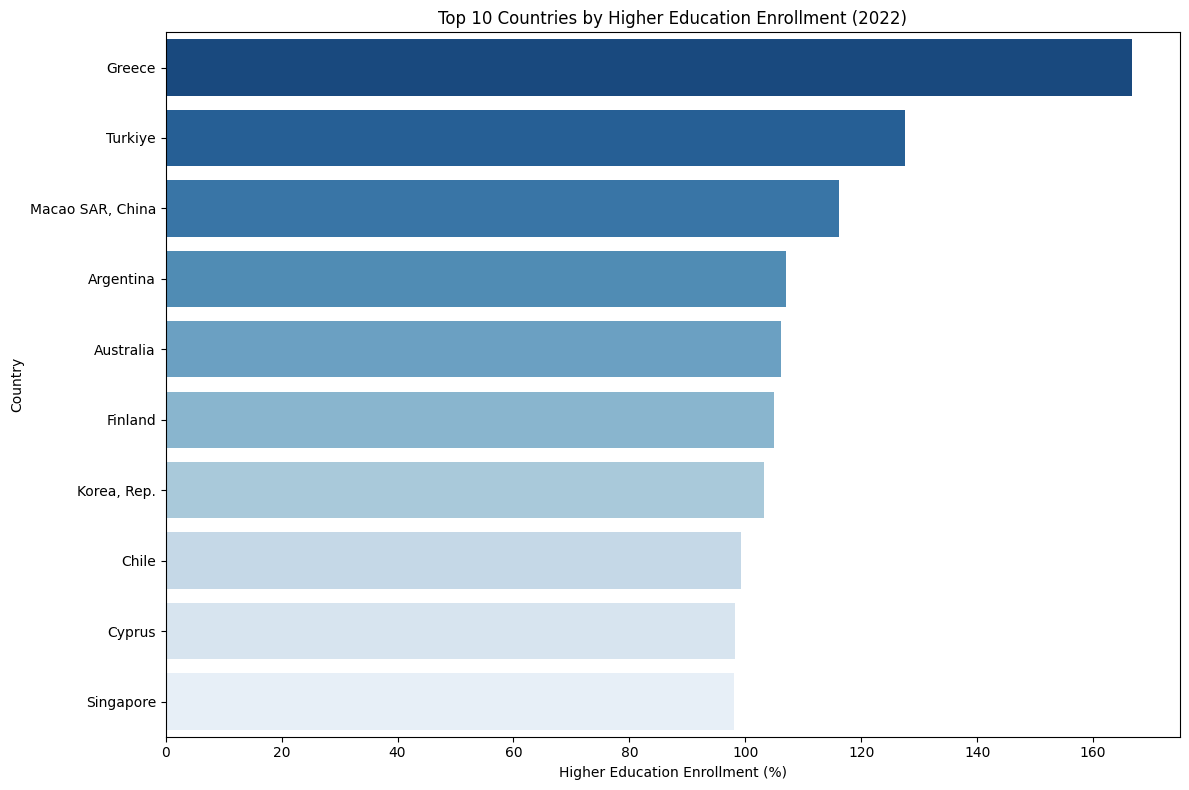

In [10]:
top10_education = data_final.sort_values(by='Education', ascending=False).head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Education', y='Country', data=top10_education, palette='Blues_r', hue='Country', legend=False)
plt.title('Top 10 Countries by Higher Education Enrollment (2022)')
plt.xlabel('Higher Education Enrollment (%)')
plt.ylabel('Country')
plt.tight_layout()

plt.savefig('../images/top10_education_countries.png')
plt.show()


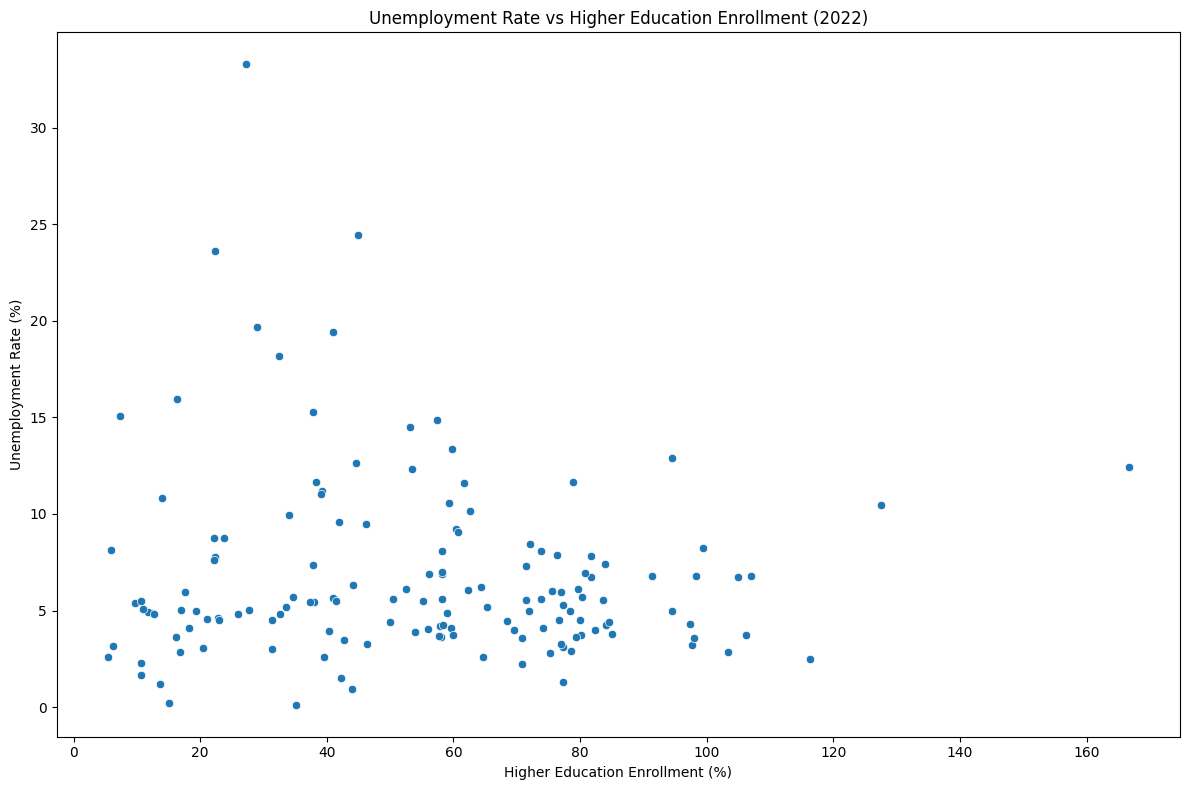

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Education', y='Unemployment', data=data_final)
plt.title('Unemployment Rate vs Higher Education Enrollment (2022)')
plt.xlabel('Higher Education Enrollment (%)')
plt.ylabel('Unemployment Rate (%)')
plt.tight_layout()

plt.savefig('../images/unemployment_vs_education.png')
plt.show()


<Figure size 1200x800 with 0 Axes>

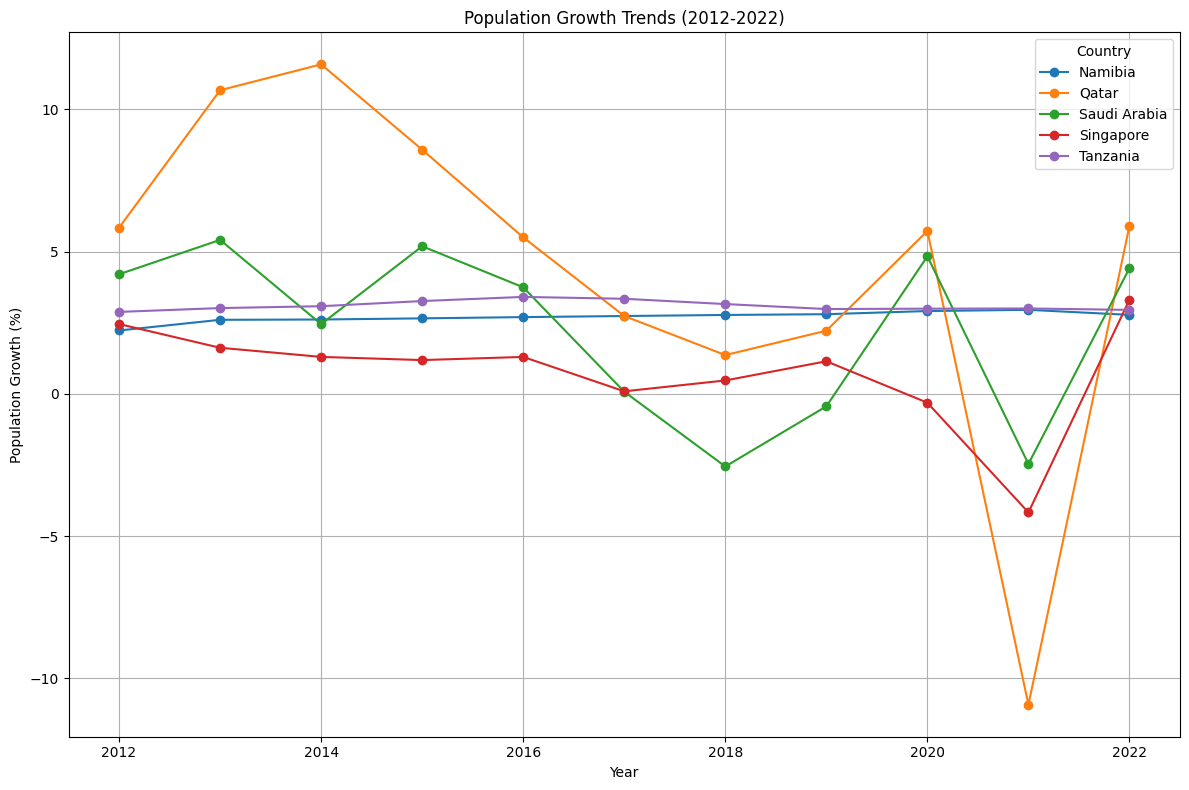

In [12]:
top5_growth_countries = data_final.nlargest(5, 'Population Growth')['Country'].tolist()

pop_growth_trends = pop_growth[pop_growth['Country Name'].isin(top5_growth_countries)]\
                    .set_index('Country Name').loc[:, '2012':'2022'].transpose()

plt.figure(figsize=(12,8))
pop_growth_trends.plot(marker='o', figsize=(12,8))
plt.title('Population Growth Trends (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Population Growth (%)')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()

plt.savefig('../images/population_growth_trends.png')
plt.show()